# 🧠 K-Means Clustering on Mall Customers Dataset

**Objective:** Perform unsupervised learning using K-Means clustering to group customers based on similar behavior.

**Tools:** Pandas, Matplotlib, Scikit-learn

In [1]:
# 1. Load and Explore the Dataset
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# 2. Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

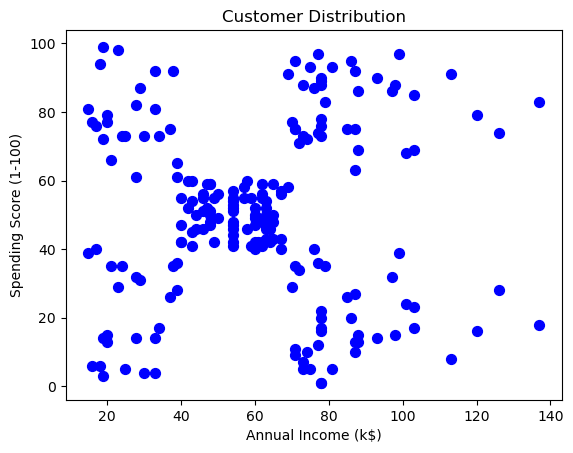

In [3]:
# 3. Visualize the Data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c='blue', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Distribution')
plt.show()

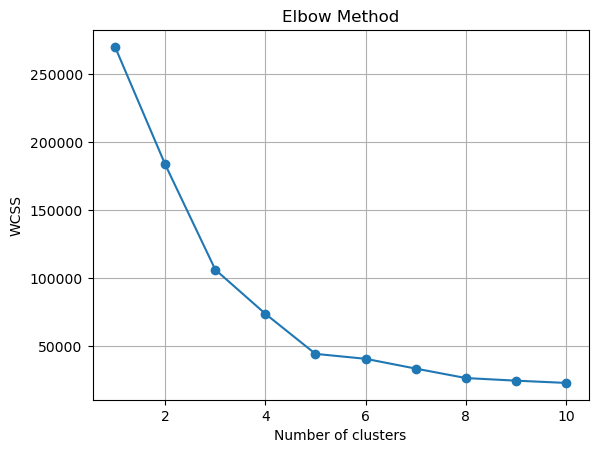

In [4]:
# 4. Elbow Method to Find Optimal K
import os
os.environ["OMP_NUM_THREADS"] = "1"
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [5]:
# 5. Fit KMeans with Optimal k (assume k=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

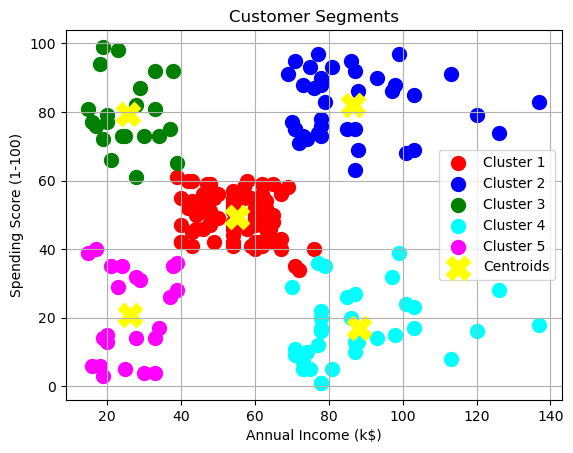

In [6]:
# 6. Visualize the Clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='X')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# 7. Evaluate using Silhouette Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {score:.2f}')

Silhouette Score: 0.55
